  <h1 style="color:BLUE" markdown="1"> Typologie des clients </h1> 

### Approche
1. faire une ACP
2. faire une classification à l'aide de la méthode de K-means et CAH
3. affecter les classes aux différents individus
4. Representation des clusters en dimensions 2 et 3 en utilsant les composantes principales
5.Analyse des clusters

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D




In [2]:
df=pd.read_csv('../Data/ML_DATA2.csv')

In [31]:
df1=pd.read_csv('../Data/DR31.txt')

C:\Users\konate\anaconda3_1\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (18,20,21,22,26,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783529 entries, 0 to 3783528
Data columns (total 42 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   CEN              int64  
 2   O                int64  
 3   P                int64  
 4   DIAM             int64  
 5   CUBCONS          int64  
 6   CUBFAC           int64  
 7   FORFAIT          int64  
 8   SOCIAL           int64  
 9   DOMEST           int64  
 10  NORMAL           int64  
 11  INDUST           int64  
 12  ADMINI           int64  
 13  MONT-SOD         float64
 14  MONT-TVA         int64  
 15  MONT-FDE         float64
 16  MONT-FNE         float64
 17  MONT-ASS-TTC     float64
 18  MONT-FRAIS-CPT   int64  
 19  TOURNEE          float64
 20  RESILIE          float64
 21  NOUVEAU          int64  
 22  ENR_EN           int64  
 23  ENR_FC           int64  
 24  ENR_FM           int64  
 25  MM_10            int64  
 26  MM_11            int64  
 27  MM_12       

In [3]:
col1=df.columns[0]
df.drop(columns=[col1],axis=1,inplace=True)


<h6 style="color:BLUE" markdown="1"> Vu la taille élévé du datasets,nous allons rechercher le nombre de cluster optimal sur 50% de la base et faire la classification sur tout le jeu de donnée</h6> 

*Concretement nous allons consolider le nombre de cluster déterminé par le k-means par la CAH puis reveneir appliquer le k-means avec ce k sur toute la base.*

**Sélection de 50% de la base de données**

In [6]:
#sélection de 50% de la base 
df_percent = df.sample(frac=0.5)

In [6]:
df_percent.shape

(1891764, 41)

>  <h6 style="color:BLUE" markdown="1"> Analyse en Composante Principal </h1> 

In [7]:
sc=StandardScaler()
x = df_percent.values
# Standardisation des features
x = StandardScaler().fit_transform(x)


In [ ]:
#ACP avec  3 composantes choisies
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])


 <span style="color:blue">Methode de Classification : K-MEANS</span>


 - <span style="color:blue">k-means avec k=40 </span>


In [23]:
kmeans = KMeans(n_clusters=40, init='k-means++', n_init=10, random_state=0)
kmeans.fit(x)
centers=kmeans.cluster_centers_
kmeans.inertia_

48049780.109281644

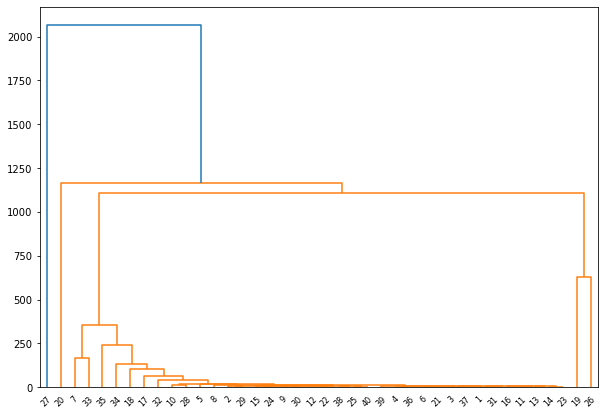

In [24]:
linked = linkage(centers, 'ward')
labelList = range(1, len(centers)+1)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

*Ce dendogramme ne nous permet pas de nous prononcer sur le nombre optimale de cluster. La partie colorié en ^bleu nous donne le nombre de cluster optimale d'après la machine. Cependant en se basant sur le critère du coude on onserve une réelle contradiction. En effet, dans la partie du dendogramme colorié en orange ce critère n'est pas respecté*

**Recherche du meilleur paramètre k**

In [27]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    


ValueError: All arguments should have the same length. The length of argument `y` is 29, whereas the length of  previously-processed arguments ['x'] is 49

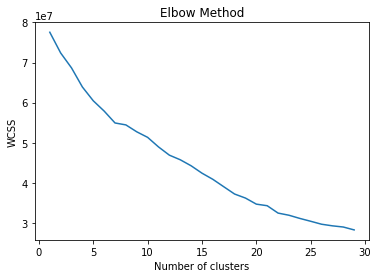

In [34]:
plt.plot(range(1, 30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

*vec ce graphe nous constatons que le nombre de clluster optimal ce trouve entre 5 et 10.
Nous allons fouiller dans la plage allant de 1 à 10 la valeur optimal de k.*

In [9]:
#reduction de la plage de recherche du meilleur K
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
    

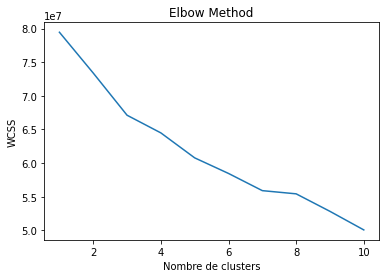

In [10]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()



*Dans ce graphe nous observons deux coude. Le premier est entre 2 et 4 , le second se trouve entre 6 et 8.
Nous allons utiliser une valeur de k=7 pour éviter d'omettre des erreurs de classement, et refaire un CAH pour calibrer cette valeur de k.*

In [52]:
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(x)

KMeans(n_clusters=7, random_state=0)

**Validation du K avec une CAH**

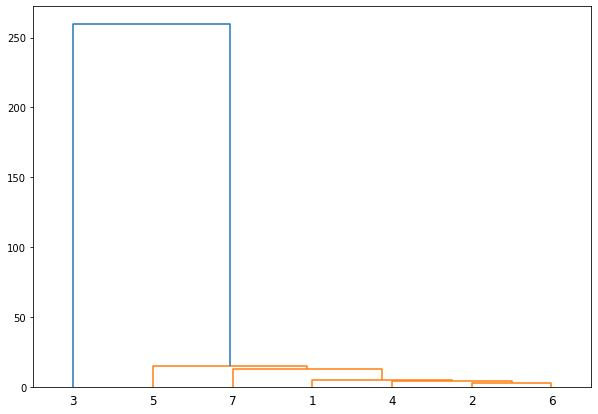

In [53]:
centers=kmeans.cluster_centers_
linked = linkage(centers, 'ward')
labelList = range(1, len(centers)+1)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

*Avec la CAH nous constatons que le nombre optimal est 4*

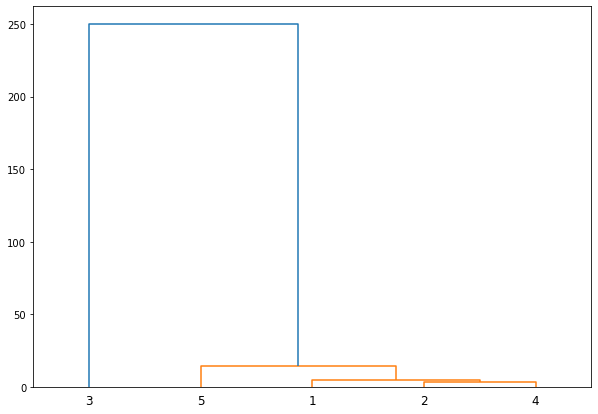

In [55]:
#choisir K=5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(x)
centers=kmeans.cluster_centers_
linked = linkage(centers, 'ward')
labelList = range(1, len(centers)+1)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

### Finalement on choisit: k=3 car cette valeur se trouve dans la plage obtenue avec le k-means

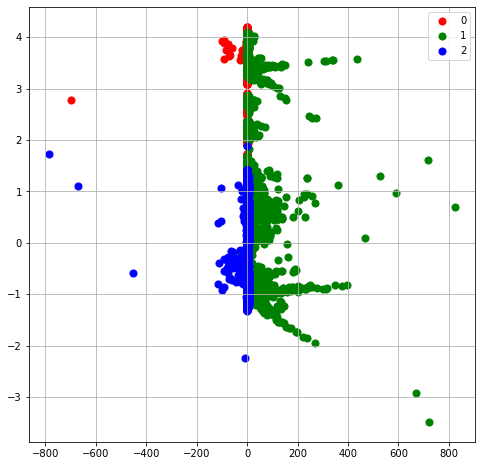

In [40]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(x)
#visualisation2D
pred_y = kmeans.fit_predict (x)
prediction=pd.DataFrame(pred_y,columns=['pred'])
finalDf = pd.concat ([principalDf, prediction[['pred']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

targets = list(np.unique(pred_y))
colors = ['r', 'g', 'b','k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['pred'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

ax.legend(targets)
ax.grid()

 # <span style="color:blue">k-means avec toute la base avec k=3 </span>


In [20]:
sc=StandardScaler()
x = df.values
# Standardisation des features
x = StandardScaler().fit_transform(x)
#ACP avec  3 composantes choisies
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])


In [23]:
#Lancement du K-means
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=0)

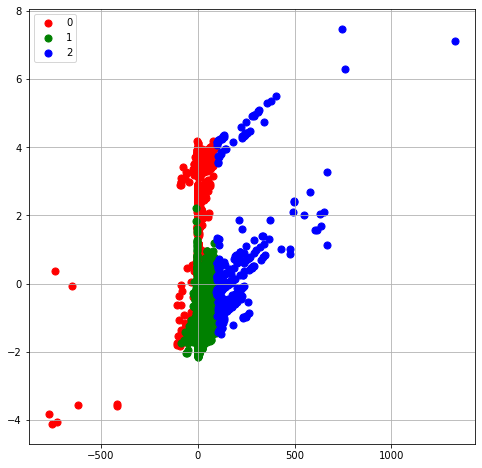

In [24]:
#visualisation2D
pred_y = kmeans.fit_predict (x)
prediction=pd.DataFrame(pred_y,columns=['pred'])
finalDf = pd.concat ([principalDf, prediction[['pred']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

targets = list(np.unique(pred_y))
colors = ['r', 'g', 'b','k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['pred'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

ax.legend(targets)
ax.grid()

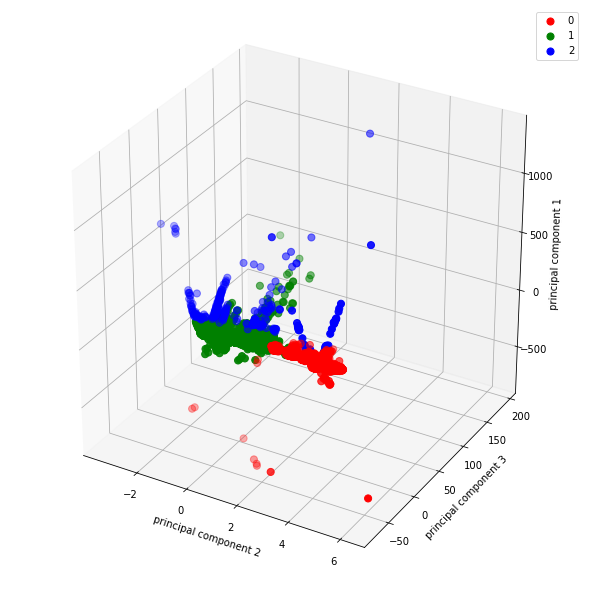

In [13]:
#visualisation 3D
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig) 
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['pred'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3'],
               finalDf.loc[indicesToKeep, 'principal component 1']
               , c = color
               , s = 50)
ax.set_xlabel('principal component 2')
ax.set_ylabel('principal component 3')
ax.set_zlabel('principal component 1')
ax.legend(targets)
ax.grid()

<span style="color:blue">Comprehension des Clusters</span>


 - <span style="color:blue">Analyse des différents groupes obtenus en fonction des variables de la base </span>


In [26]:
prediction['pred'].replace([0,1,2],['Gr1','Gr2','Gr3'],inplace=True)
prediction['pred'].head()

0    Gr2
1    Gr2
2    Gr2
3    Gr2
4    Gr2
Name: pred, dtype: object

In [27]:
#Groupes(clusters)

df_group = pd.concat ([df, prediction[['pred']]], axis = 1)
df_group1=df_group[df_group.pred==0]
df_group2=df_group[df_group.pred==1]
df_group3=df_group[df_group.pred==2]
dic={'Groupe1':[df_group1.shape[0],df_group1.shape[0]/df.shape[0]]\
     ,'Groupe2':[df_group2.shape[0],df_group2.shape[0]/df.shape[0]]\
     ,'Groupe3':[df_group3.shape[0],df_group3.shape[0]/df.shape[0]]}
taille=pd.DataFrame(dic)
taille

,Groupe1,Groupe2,Groupe3
0,0.0,0.0,0.0
1,0.0,0.0,0.0


* Le cluster 1 constitue 19% du jeu données
* Le cluster 2 constitue 80.4% du jeu de données
* Le cluster 3 constitue environ 0.01% du jeu de données

In [32]:
croisement=pd.crosstab(df1['ENR'],df_group['pred'],normalize='index')
print(croisement)

pred       Gr1       Gr2       Gr3
ENR                               
AV    0.294619  0.705381  0.000000
EN    0.543340  0.456597  0.000063
FC    0.417007  0.582305  0.000687
FM    0.058303  0.916189  0.025508


* *Nous remarquons que cluster1 est caractérisé par une très faible présence en AV, EN , FC, FM. Dans cette catégorie d'abonnés le type d'abonnement est faiblemnt représenté.*
* *Nous pouvons voir aussi que le cluster 2 est caractérisé par une forte présence en AV, EN, FC, FM. Dans cette catégorie d'abonnés on a avec un fort taux tous les types d'abonnements.*
* *Dans le cluster 3 il n'y a pas du tout d'abonnement ody type AV, une probabilité négligeable d'avoir un abonnement de type EN ainsi que FC, et une très faible probabilité d'avoir un abonnement de type FM. Cependant cette probabilité est nettement meilleur que celle d'avoir un abonnement de type AV et EN qui sont presqu'inexistantes.*

In [33]:
croisement=pd.crosstab(df1['O'],df_group['pred'],normalize='index')
print(croisement)

pred       Gr1       Gr2       Gr3
O                                 
1     0.554732  0.445160  0.000108
2     0.517552  0.482372  0.000076
3     0.522143  0.477835  0.000022
4     0.524321  0.475661  0.000018
5     0.528437  0.471539  0.000024
6     0.527869  0.472104  0.000027
7     0.531490  0.468510  0.000000
8     0.532536  0.467464  0.000000
9     0.544057  0.455943  0.000000


* *Les abonnés qui se trouvent dans le cluster 1 se trouve dans les différents ordres mais une faible proportion.*
* *Les abonnés qui se trouveent dans le cluster 2 sont également dans tous les ordres avec une grande proportion.*
* *Les abonnés qui se trouvent dans le cluster 3 n'apparaissent pas dans les ordres 7, 8 et 9. En plus ils se trouvent dans les autres ordres avec une proportions négligeables.*

In [34]:
croisement=pd.crosstab(df1['RESILIE'],df_group['pred'],normalize='index')
print(croisement)

pred          Gr1       Gr2       Gr3
RESILIE                              
0.0      0.778933  0.220949  0.000118
1.0      0.448825  0.551101  0.000074


* *la probabilité qu'un abonné soit dans le cluster 1 sachant qu"il a résilié sont abonnement est de 0,7 . Les abonnés ayant rédilié leur abonnement sont en majorité dans le cluster 1.*
* *la probabilité qu'un abonné soit dans le cluster sachant que ce abonné n'a pas résilié son abonnement est 0,99 . ce cluster est caractérisé par des abonné qui sont fidèles.*
* *la probabilité qu'un abonné soit dans cluster 3 sachant qu'il ait résilié ou pas son abonnement est très faible , voire négligeable.*


In [35]:
croisement=pd.crosstab(df1['CATEGORIE'],df_group['pred'],normalize='index')
print(croisement)

pred            Gr1       Gr2       Gr3
CATEGORIE                              
ADMIN      0.503829  0.494692  0.001479
PRIVE      0.541628  0.458307  0.000065


* *La probabilité qu'un abonné de la categorie ADMIN soit dans le groupe 1 est à peu près égale à celle qu'un abonné de catégorie PRIVE soit dans cette classe. Cette probabilité est faible autour de 0,17.*
* *La probabilité qu'un abonné de la categorie ADMIN soit dans le groupe 2 est à peu près égale à celle qu'un abonné de catégorie PRIVE soit dans cette classe. Cette probabilité est égale à 0,82.*
* *La probabilité qu'un abonné de la categorie ADMIN soit dans le groupe 1 est nettement meilleur à celle qu'un abonné de catégorie PRIVE soit dans cette classe. Cependant ces deux probabilités restent négligeables*

 **Nous pouvons affirmer que cette variable ne caractérise pas les différents groupe car les probabilités conditionnelles sont sensiblement égales pour les évènements**


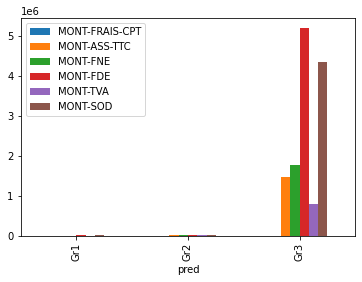

In [36]:
df_group.groupby(['pred']).mean()[['MONT-FRAIS-CPT','MONT-ASS-TTC','MONT-FNE','MONT-FDE','MONT-TVA','MONT-SOD']].plot.bar()

*Nous remarquons que les abonnés du groupe 3 ont en général les grosses factures.*

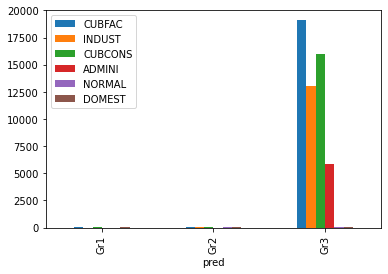

In [37]:
df_group.groupby(['pred']).mean()[['CUBFAC','INDUST','CUBCONS','ADMINI','NORMAL','DOMEST']].plot.bar()

*Nous remarquons que le groupe 3 depense plus en consommation alors que les autres groupes o,t une faible consommation moyenne.
Le groupe 3 est un petit groupe mais leur consommation est très élevés. Ils sont sans doute les gros clients*

## _Difficultés rencontrées:_
       -  Taille très grande du dataset
       -  Manque de ressources suffisantes pour l'exécution des différents algorithmes même sur kaggle 
       -Manque d'information pertinente sur les variables
        

Ce code ci-dessus permet sauvegarder une version du fichier traité